In [4]:
import pandas as pd
import numpy as np

In [5]:
data_path = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [6]:
!wget $data

wget : URL manquante
Utilisation : wget [OPTION]… [URL]…

Utilisez « wget --help » pour obtenir plus de renseignements.


In [7]:
df = pd.read_csv('data.csv')

## 2. Data Preparation

In [8]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
object_columns = df.dtypes[df.dtypes == 'object'].index
for column in object_columns:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

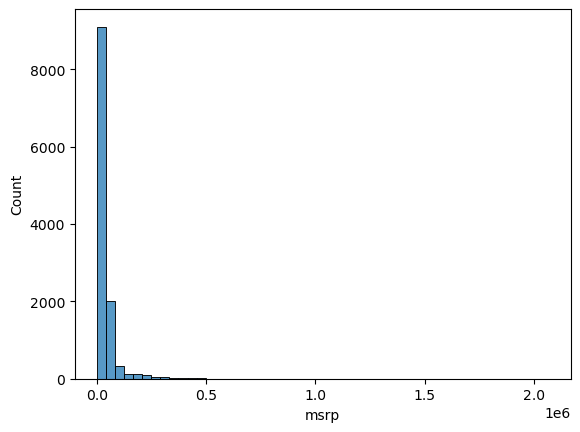

In [16]:
sns.histplot(df.msrp, bins=50)
plt.show()

In [17]:
pd.set_option('float_format', '{:f}'.format)

In [18]:
df.msrp.describe()

count     11914.000000
mean      40594.737032
std       60109.103604
min        2000.000000
25%       21000.000000
50%       29995.000000
75%       42231.250000
max     2065902.000000
Name: msrp, dtype: float64

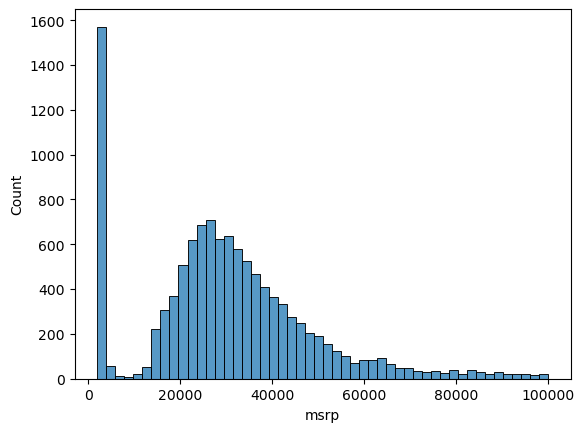

In [19]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

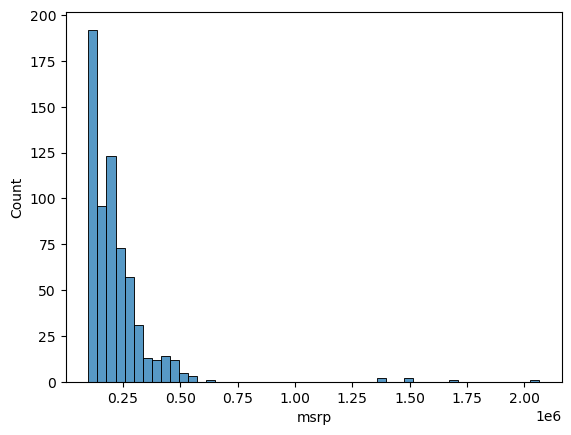

In [20]:
sns.histplot(df.msrp[df.msrp >= 100000], bins=50)
plt.show()

In [21]:
np.log([1, 1, 10, 100, 1000, 10000, 1000000]) - np.log1p([0, 1, 10, 100, 1000, 10000, 1000000])

array([ 0.00000000e+00, -6.93147181e-01, -9.53101798e-02, -9.95033085e-03,
       -9.99500333e-04, -9.99950003e-05, -9.99999500e-07])

Apply log to skewed distribution

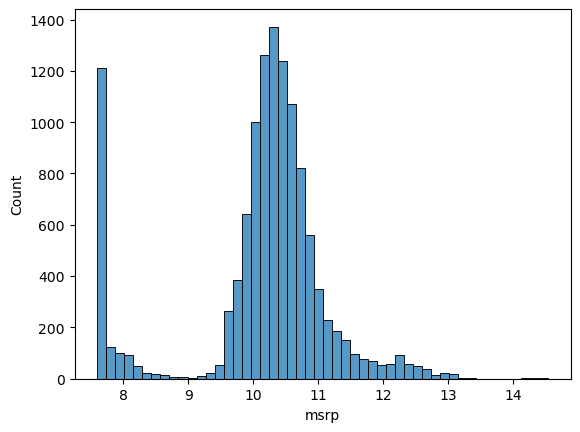

In [22]:
sns.histplot(np.log1p(df.msrp), bins=50)
plt.show()

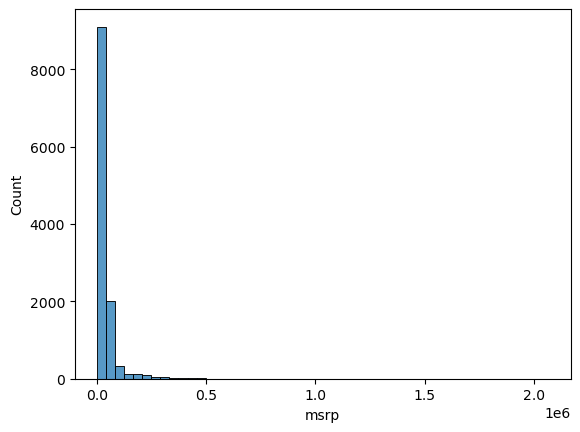

In [23]:
sns.histplot(df.msrp, bins=50)
plt.show()

As we can see, after apply log, df.msrp goes from very right-skewed distribution to normal distribution.

In [24]:
df.msrp = np.log1p(df.msrp)

Check missing values

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [26]:
n = len(df)

### Split into train, validation and test

In [27]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

In [28]:
print(n_train, n_val, n_test, n_train + n_val + n_test - n)

7148 2382 2384 0


In [29]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    ``arange`` can be called with a varying number of positional arguments:
    
    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.
    
    For integer arguments the function is roughly equivalent to the Python
    built-in :py:class:`range`, but returns an ndarray rather than a ``range``
    instance.
    
    When using a non-integer step, such as 0.1, it is often better to use
    `numpy.linspace`.
    
    S

In [30]:
idx = np.arange(n)

In [31]:
np.random.seed(2)
np.random.shuffle(idx)

In [32]:
help(df.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  .. deprecated:: 2.2.0
 |  
 |     Returning a tuple from a callable is deprecated.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on
 |    some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    abov

In [33]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val-1]]
df_test = df.iloc[idx[-n_test:]]

In [34]:
print(len(df_train), n_train)
print(len(df_val), n_val)
print(len(df_test), n_test)

7148 7148
2381 2382
2384 2384


In [35]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.000000,4.000000,manual,front_wheel_drive,2.000000,NaN,compact,coupe,33,24,1385,9.575747
6720,toyota,matrix,2012,regular_unleaded,132.000000,4.000000,automatic,front_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,32,25,2031,9.887663
5878,subaru,impreza,2016,regular_unleaded,148.000000,4.000000,automatic,all_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,37,28,640,9.893235
11190,volkswagen,vanagon,1991,regular_unleaded,90.000000,4.000000,manual,rear_wheel_drive,3.000000,NaN,large,passenger_minivan,18,16,873,7.601402
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.000000,8.000000,automatic,four_wheel_drive,4.000000,flex_fuel,large,crew_cab_pickup,21,15,5657,10.937757


In [36]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

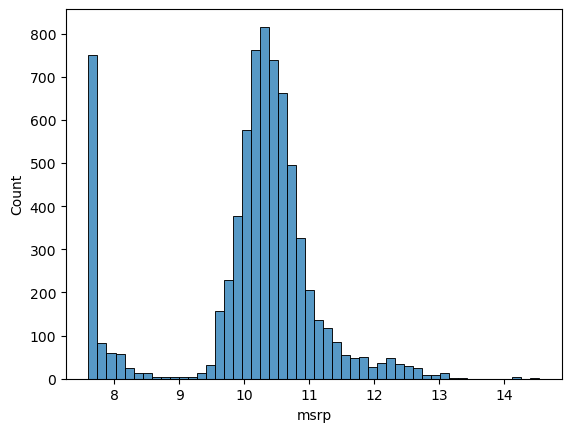

In [37]:
sns.histplot(df_train.msrp, bins=50)
plt.show()

In [38]:
y_train = df_train.msrp
y_val = df_val.msrp
y_test = df_test.msrp

In [40]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [93]:
def train_linear_regression(x, y):
    X = np.column_stack([np.ones(x.shape[0]), x])
    XTX = np.dot(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = np.dot(XTX_inv, X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [94]:
x = [[148, 24, 1385], [132, 25, 20311], [453, 11, 86], [158, 24, 185], [172, 25, 201], [413, 11, 86], [38, 54, 185], [142, 25, 431], [453, 31, 86], ]
x = np.array(x)
x

array([[  148,    24,  1385],
       [  132,    25, 20311],
       [  453,    11,    86],
       [  158,    24,   185],
       [  172,    25,   201],
       [  413,    11,    86],
       [   38,    54,   185],
       [  142,    25,   431],
       [  453,    31,    86]])

In [95]:
y = [1100, 200, 150, 250, 100, 200, 150, 250, 120]

In [96]:
w0, w = train_linear_regression(x, y)
print(w0, w)

830.4347660408773 [-1.09795913e+00 -1.05792264e+01 -8.93426615e-03]


In [97]:
x.shape

(9, 3)

In [99]:
y_pred = w0 + x.dot(w)
y_pred

array([401.66142237, 239.55962092, 215.91944197, 401.40295043,
       375.30934793, 259.83780725, 215.7812544 , 406.19324068,
         4.33491405])

## Car price baseline model

In [71]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [72]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train_base = df_train[base]

In [73]:
df_train_base.columns

Index(['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'popularity'],
      dtype='object')

In [74]:
df_train_base = df_train_base.fillna(0)

In [103]:
x_train = df_train_base.values

In [104]:
w0, w = train_linear_regression(x_train, y_train)

In [105]:
y_train_pred = w0 + x_train.dot(w)

<Axes: xlabel='msrp', ylabel='Count'>

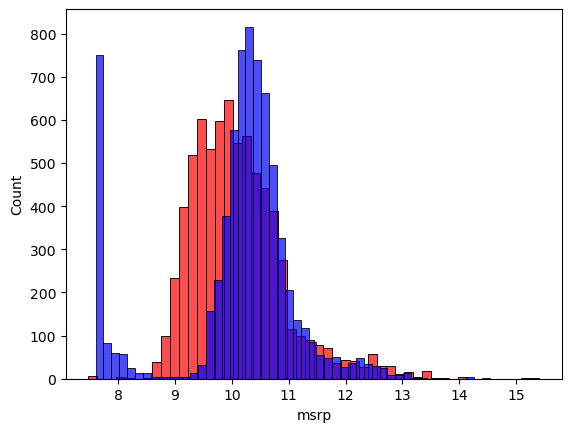

In [111]:
sns.histplot(y_train_pred, color='red', alpha=0.7, bins=50)
sns.histplot(y_train, color='blue', alpha=0.7, bins=50)

## RMSE

In [114]:
def rmse(y, y_pred):
    err = y - y_pred
    serr = err ** 2
    mse = serr.mean()
    return np.sqrt(mse)

In [116]:
rmse_train = rmse(y_train_pred, y_train)
rmse_train

0.7554591756909307

In [118]:
def prepare_X(df, base):
    df_base = df[base]
    df_base = df_base.fillna(0)
    X = df_base.values
    return X

In [120]:
X_val = prepare_X(df_val, base)
y_val_pred = w0 + X_val.dot(w)